<h1><center>Statistics of Grassland in Lower Saxony

<h2><center>Introduction

- get acquitained with geodata in agriculture
- get used to geodata from administrative institutions
- show basic commands in geopandas
- be able to validate administrative land use statistics

<h2><center>Map of German States

https://en.wikipedia.org/wiki/File:States_of_Germany.svg#/media/File:States_of_Germany.svg

Author of the shown map: <a href="https://en.wikipedia.org/w/index.php?title=User:Escondites&redirect=no">Escondites</a> 

In [2]:
import pandas as pd
import geopandas as gpd
print("Version of Pandas:",pd.__version__)
print("Version of GeoPandas:",gpd.__version__)

Version of Pandas: 1.0.3
Version of GeoPandas: 0.6.1


<h2><center> Retrive Grassland Data

1. Read use conditions below:

https://www.lbeg.niedersachsen.de/kartenserver/web_map_services_wms/kartendienste-web-map-services-des-lbeg-91769.html

https://www.lgln.niedersachsen.de/startseite/onlinedienste_services/onlinedienste/webdienste-der-nds-vermessungs--und-katasterverwaltung-154080.html

2. Download the following file from

https://sla.niedersachsen.de/mapbender_sla/download/FB_NDS.zip

3. Unzip file

<h2><center> Reference system identifier



In addition, following information is needed:

EPSG / ETRS1989 UTM Zone 32 (EPSG:**25832**) / 7.4 

<h2><center> Import Data

In [4]:
fields = gpd.read_file("C:\\Users\\Jens Harbers\\Downloads\\FB_NDS\\FB_NDS.shp")
fields.crs = "epsg:25832"

In [5]:
fields.head()

,flik,flaeche,ant_jahr,bnk,bnk_txt,stand,geometry
0,DENILI0223600036,1.7530,2021,GL,Grünland,2021-01-27,"POLYGON ((560701.020 5846401.045, 560697.058 5..."
1,DENILI0223600060,0.8671,2021,GL,Grünland,2021-01-27,"POLYGON ((561643.403 5847640.096, 561618.369 5..."
2,DENILI0223600069,0.7200,2021,AL,Ackerland,2021-01-27,"POLYGON ((561341.601 5847572.948, 561300.995 5..."
3,DENILI0223600072,4.5751,2021,AL,Ackerland,2021-01-27,"POLYGON ((561291.553 5849232.180, 561238.967 5..."
4,DENILI0223600023,10.2809,2021,AL,Ackerland,2021-01-27,"POLYGON ((559993.966 5844943.780, 560071.598 5..."


<h2><center> List of Abbreviations 

column name | description | type
------ | ------|----------
flik      | Field Identification Code     | string
flaeche       | area 10000 m<sup>-2</sup>   | float
ant_jahr      |  Year of entry     | integer  
bnk      | Agricultural indicator  abbr.    | string 
bnk_txt      |    Agricultural indicator   | string 
stand      |  entry  date    | date 
geometry      | shape      | Polygon

<h2><center> Spatial Representation of Agricultural Land in Lower Saxony

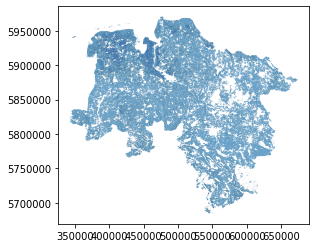

In [6]:
fields.plot()

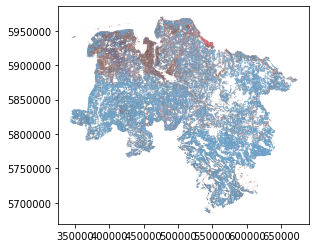

In [7]:
fields.plot(column="bnk_txt")

<h2><center> Distribution of Land Size [ha] by Management System

In [8]:
fields["Area"] = fields.area

In [9]:
fields.groupby("bnk_txt")["flaeche"].describe()

,count,mean,std,min,25%,50%,75%,max
bnk_txt,,,,,,,,
Ackerland,249985.0,7.186184,9.350144,0.0041,1.878800,4.06610,8.870500,301.4721
Aufforstungsfläche,1267.0,1.443251,1.375927,0.0345,0.633500,1.04570,1.771950,18.2858
Dauerkulturen,6328.0,2.713158,3.598311,0.0060,0.596475,1.48800,3.388250,48.7774
Grünland,275538.0,2.596195,3.858342,0.0077,0.789500,1.60870,3.047400,261.0155
Mischblock,12581.0,8.308213,10.730640,0.0715,2.608800,5.09700,9.864200,310.3765
SO nicht beihilfefähig,312.0,1.381582,5.600531,0.0109,0.142225,0.38990,0.951325,91.0363
Sonstiges,1142.0,1.457391,2.427699,0.0143,0.249500,0.64235,1.570900,22.8073


<h2><center>  Distribution of agriculturally used land by usage

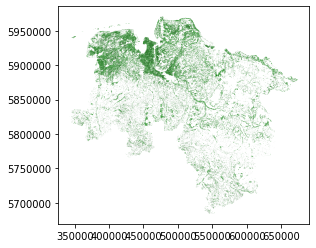

In [10]:
fields[fields.bnk_txt == "Grünland"].plot(color="green")

In [11]:
total = fields.flaeche.sum()
fields.groupby("bnk_txt")["flaeche"].sum() / total * 100

bnk_txt
Ackerland                 68.113801
Aufforstungsfläche         0.069333
Dauerkulturen              0.650975
Grünland                  27.123245
Mischblock                 3.963197
SO nicht beihilfefähig     0.016344
Sonstiges                  0.063105
Name: flaeche, dtype: float64

<h1><center>  Thanks for Your Attention!